<div style="text-align:center">
<h1>Transforming Data</h1>
<h2>7SSG2059 Geocomputation 2018/19</h2>
</div>

## Learning Outcomes

By the end of this practical you should:
- be able to standardise variables to achieve different insights about data 
- understand what z-scores are and how they are related to the standard normal distribution 
- appreciate how data can be transformed, again leading to different insights about data. 

## Statistics as Judgement

We hope that you'll go on to make lots of use of what you're learning here, but the single most important thing that you can take away from the remaining weeks of the class is the idea that statistics is not _truth_, it is _judgement_.

[![Are you above average?](http://img.youtube.com/vi/hQLCWHww9OQ/0.jpg)](http://www.youtube.com/watch?v=hQLCWHww9OQ)

### Data as Representation of Reality

The statistician George Box [once said](https://en.wikipedia.org/wiki/All_models_are_wrong) "all models are wrong but some are useful". Now you might think that 'wrong' _necessarily implies_ uselessness, but this aphorism is a lot more interesting than that: let's review the idea of statistics as the study of a '[data-generating process](http://onlinelibrary.wiley.com/doi/10.1111/j.1467-9639.2012.00524.x/full)'. 

The data that we work with is a _representation_ of reality, it is not reality itself. Just because I can say that the height of human beings is normally distributed with a mean of, say, 170cm and standard deviation of 8cm doesn't mean that I've _explained_ that process. What I have done is to say that reality can be reasonably well approximated by a data-generating process that uses the normal distribution. 

Given that understanding of height distributions, I know that someone with a height of 2m is very, very improbable. Not impossible, just highly unlikely. So if I meet someone that tall then that's quite exciting! But my use of a normal distribution to represent the empirical reality of human height doesn't mean that I think our height is _actually_ distributed randomly using a gigantic lottery system: some parts of the world are typically shorter, other parts typically taller; some families are typically shorter, while others are typically taller...

So the _real_ reason for someone's height is to do with, I assume, a mix of genetics and nutrition. However, across large groups of people it's possible to _represent_ the cumulative impact of those individual realities with a simple normal distribution. And using that simplified data-generating process allows me to do things like estimate the likelihood of meeting someone more than 2m tall (which is why I'd be excited to do so, though not as excited as the guy in the next video...).

Here's a (genuinely terrifying) video that tries to explain this whole idea in a different way:

[![From reality to make-believe](http://img.youtube.com/vi/HAfI0g_S9oo/0.jpg)](https://www.youtube.com/watch?v=HAfI0g_S9oo)

In the same way, different parts of a city may have different characteristics in terms of their physical structure, ethnic composition, affluence, etc, etc...  Because of wide variations in underlying data generating processes, different areas of a city may be similar or different to one another across  multiple different charateristics. But by comparing between locations and examining patterns (including the distriubtion of characteristics and looking at the extremes) we may be able to begin to think about what the underlying processes are. 

Let's start with the usual bits of code to ensure plotting works, to import packages and load the data into memory (with a quick check that it loaded properly):

In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns

This week, we'll use the `usecols` argument of the `read_csv` pandas method to read only the columns we'll use in this week's analysis. You maye want to learn more about the `usecols` method online, but at least check you can see roughly what it is doing in the code below. 

In [3]:
dfs = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LSOA%20Data.csv.gz?raw=true',
    compression='gzip', 
    low_memory=False, 
    usecols = ['LSOA11NM','USUALRES','HHOLDRES','COMESTRES','POPDEN','HHOLDS','MedianIncome','GreenspaceArea','RoadsArea','Owned','White','Area']) 
dfs.columns

Index(['LSOA11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS',
       'GreenspaceArea', 'RoadsArea', 'Owned', 'White', 'MedianIncome',
       'Area'],
      dtype='object')

We'll also run a new bit of code to supress the warning we've been getting recently. The code ensures warnings are not displayed, making results easier to read, but beware in future that hiding these messages may lead us to miss useful information...

In [4]:
import warnings 
warnings.simplefilter('ignore')

## Normalisation

The Python developers of `sklearn` define [normalisation](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) as "scaling individual samples to have **unit norm**." There are a _lot_ of subtleties to this when you start dealing with 'sparse' data, but for the most part it's worthwhile to think of this as a rescaling of the raw data to have similar ranges in order achieve some kind of comparison. 

This is such a common problem that `sklearn` offers a range of such (re)scalers including: `MinMaxScaler` and `RobustRescaler`.

Let's start with the raw data:

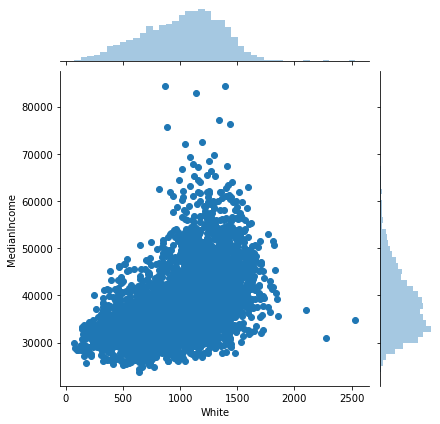

In [5]:
sns.jointplot(data=dfs, x='White', y='MedianIncome')

In [6]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
rb_scaler = preprocessing.RobustScaler(quantile_range=(5.0, 95.0))

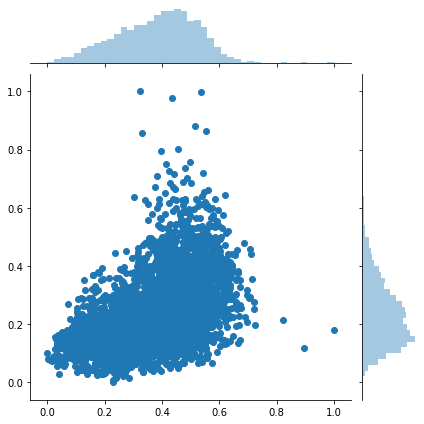

In [7]:
x = mm_scaler.fit_transform(dfs.White.values.reshape(-1, 1))
y = mm_scaler.fit_transform(dfs.MedianIncome.values.reshape(-1, 1))
sns.jointplot(x=x, y=y)

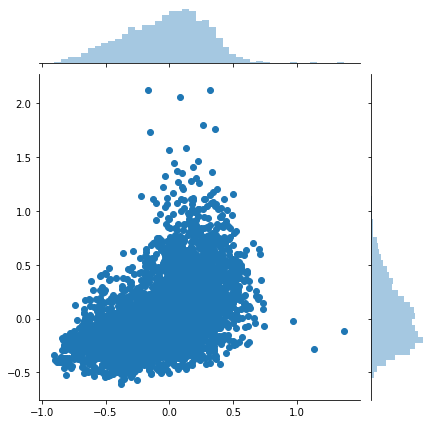

In [8]:
x = rb_scaler.fit_transform(dfs.White.values.reshape(-1, 1))
y = rb_scaler.fit_transform(dfs.MedianIncome.values.reshape(-1, 1))
sns.jointplot(x=x, y=y)

##### Task 1.1

Can you see the differences between these two rescalers, and can you explain why you might want to choose one over the other?

> You answer here!

##### Task 1.2

Can you explain the differences between the Min/Max rescaler and simply calculating a proportion (_ie._ the percentage of White residents), and can you explain why you might want to choose one over the other?

> You answer here!

Notice that we did 'fitting' _and_ 'transforming' of the data in one step (`fit_transform`)? It is also possible to do these separately: to `fit` on one data set and then `transform` on another. This kind of situation arises in Machine Learning pipelines because they are often first used in a training context (fit and transform) and then in a testing or production context (transform only) where you either want to ensure that your approach is robust, or where data continues to come in over time and you need to transform it 'on the fly'. To try to illustrate this let's split one of the variables in half and see what happens:

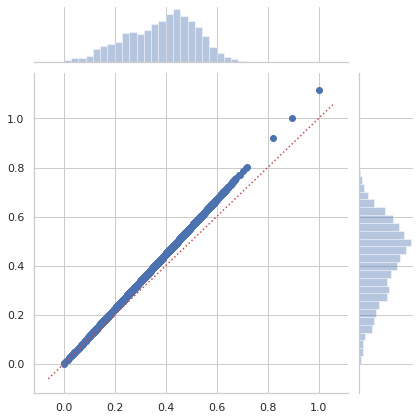

In [26]:
sns.set(style="whitegrid")
x1 = dfs.sample(frac=0.5, replace=False, random_state=42).White.values.reshape(-1, 1)
x2 = dfs.sample(frac=0.5, replace=False, random_state=84).White.values.reshape(-1, 1)

g = sns.jointplot(x=mm_scaler.fit(x2).transform(x2), y=mm_scaler.fit(x1).transform(x2))

# Plot a line on the diagonal:
# https://stackoverflow.com/questions/31391553/drawing-diagonal-line-line-of-equality-on-seaborn-jointplot
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':r') 

##### Task 1.3

Can you see the differences between these two outputs (fitted on `x1` and fitted on `x2`), and can you explain why you might want to choose one over the other?

> You answer here!

##### Task 1.4

Write code to create (where necessary) and compare the following variables between LSOAs:
1. total road area and road area standardised by area using a sensible variable 
2. total number of white people and white people standardised (proportion) by a sensible population variable 

In each case:
- Create a jointplot of the raw and normalised variables.
- Print and examine the **bottom 10** LSOAs. 

            LSOA11NM  RoadsArea        Area  Roads_prop
1432    Enfield 017D        0.0  377407.896         0.0
816     Bromley 027E        0.0  209871.948         0.0
815     Bromley 021E        0.0  361081.688         0.0
1636  Greenwich 033B        0.0  193920.985         0.0
813     Bromley 021D        0.0  406739.690         0.0
812     Bromley 021C        0.0  591225.950         0.0
811     Bromley 018E        0.0  221568.317         0.0
3330     Merton 004D        0.0  213751.977         0.0
2263   Havering 004E        0.0  190416.710         0.0
808     Bromley 021A        0.0  513900.760         0.0


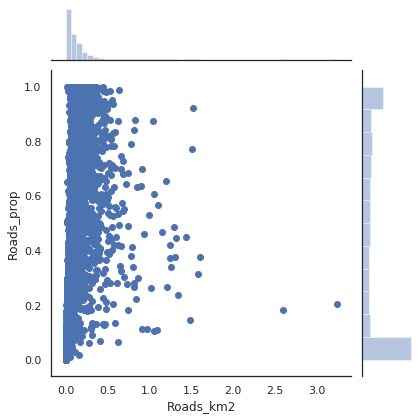

In [29]:
sns.set(style='white')
dfs['Roads_prop'] = dfs.RoadsArea / dfs.Area
dfs['Roads_km2'] = dfs.RoadsArea/1000000
sns.jointplot(data=dfs, x='Roads_km2', y='Roads_prop')
print(dfs.sort_values(by='Roads_prop', ascending=True).head(10).round(3)[['LSOA11NM','RoadsArea','Area','Roads_prop']])

         LSOA11NM  White  USUALRES  White_prop
1339  Ealing 026A   78.0      2201       0.035
1340  Ealing 026B   72.0      1923       0.037
1345  Ealing 026F  121.0      2217       0.055
1343  Ealing 026D   97.0      1685       0.058
3452  Newham 010A  142.0      2379       0.060
1346  Ealing 037A  132.0      1923       0.069
1341  Ealing 023E  127.0      1802       0.070
1353  Ealing 037G  110.0      1499       0.073
3494  Newham 008D  171.0      2277       0.075
618    Brent 029E  157.0      2087       0.075


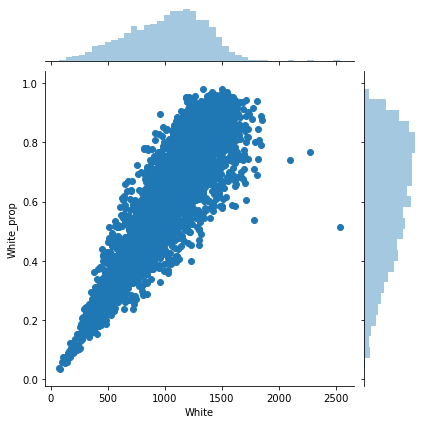

In [11]:
dfs['White_prop'] = dfs.White / dfs.USUALRES
sns.jointplot(data=dfs, x='White', y='White_prop')
print(dfs.sort_values(by='White_prop', ascending=True).head(10).round(3)[['LSOA11NM','White','USUALRES','White_prop']])

## Standardisation

Recall that standardisation is typically focussed on rescaling data to have a mean (or median) of 0 and standard deviation of 1 and that these approaches are therefore closely tied to the idea of the standard normal distirbution which we'll also get into some detail later on. However, and rather confusingly, many data scientists will refer to standardisation and normalisation largely interchangeably.

Techniques covered in this section include:
1. Z-score standardisation.
2. Inter-quartile standardisation.
3. Inter-decile standardisation.

### Z-Score Standardisation

You've calculated this before, but in the context we can now see how z-scores enable us to compare data across different groups of observations. We can easily compare two percentages to know which one is more, and which less (e.g. I got 80% on one exam and 70% on the other). But let's think about a slightly different question: _which exam did I do better on relative other students?_ What if you got 80% on an exam where everyone else got 85%? Suddenly that doesn't look quite so good right? And what if your 70% was on an exam where the average mark was 50%? Suddenly that looks a lot better, right?

The z-score is designed to help you perform this comparison directly.

As a reminder, the z-score looks like this:
$$
z=(x-\mu)/\sigma
$$

That's: `(<data> - <mean>)/<standard deviation>`

#### Using the Z-Score

Let's start to bring the idea of the 'data generating processes' to life. The first thing to do with the z-score is to look at what it implies:

1. Subtracting the mean implies that the mean _is a useful measure of centrality_: in other words, the only reason to subtract the mean is if the mean is _meaningful_. If you are dealing with highly skewed data then the mean is not going to be very useful and, by implication, neither is the z-score.
2. Dividing by the Standard Deviation implies that this _is a useful measure of distribution_: again, if the data is heavily skewed or follows some exponential distribution then the standard deviation is not going to very useful as an analytical tool.

So the z-score is _most_ relevant when we are dealing with something that looks vaguely like a standard normal distribution (which has mean=0 and standard deviation=1). In those cases, anything with a z-score more than 1.96 standard deviations from the mean is in the 5% significance zone. But remember: we can't really say _why_ one particular area has a high concentration of well-off individuals or why one individual is over 2m tall. All we are saying is that this standardised value is a pretty unlikely outcome _when compared to our expectation that people are randomly distributed across the region_ or _that people have randomly-distributed heights of mean 'x' and standard deviation 'y'_. 

Of course, we _know_ that people aren't randomly distributed around the country in the same way that we know that height isn't genuinely random becuase of the influence of genetics, nutrition, etc. But we need a way to pick out what counts as _**significant**_ over- or under-concentration (or height) from the wide range of 'a bit more' or 'a bit less' than 'normal'. **_If_** a normal distribution does a good job of representing the overall distribution of heights (_whatever_ the reason) then someone of 2m is highly unlikely but we can't say _how_ unlikely until we've placed them on the distribution.

Let's put it another way:
* Is 10% of wealthy individuals in a small area a high concentration?
* How about 20%?
* Or 30%?

The only way to answer that question is to use something like the z-score since it standardises all of the values _against the average_. If wealthy people were distributed at random then we would _expect_ that most areas would have about the average concentration. Some areas will have a few more. Some areas a few less. But according to the way that the standard normal distribution works, _nowhere_ should have a z-score of 10. Or 20, since that is 20 standard deviations from the mean and just shouldn't exist in the lifetime of the universe. So if we see that kind of result then we know two things:

1. That our assumption that normal distribution is a reasonable representation of reality breaks down at some point.
2. That there are _some_ areas with _highly significant_ over- or under-representation by wealthy residents.

But that's ok, because we're trying to set an expectation of what we think we'll see so that we can pick out the significant outliers.

#### Setting Expectations

And here we get to the crux of the issue, most frequentist statistics boils down to this: subtracting **what you expected** from **what you got**, and then dividing by **some measure of spread** to control for the range of the data. We then look at what's _left_ to see if we think the gap between expectations and observations is _meaningful_ or whether it falls within the range of 'random noise'.

It should be obvious that it's the _**expected**_ part of that equation that is absolutely crucial: we come up with a process that generates data that _represents_ the most important aspects of reality, but we shouldn't imagine that our process has explained them. It's the first step, not the last.

#### Z-Score Standardisation in Pandas

Let’s take our ownership column and calculate a new series called `OwnedZStd`!

One way to do this is would be to do it in two stages: subtract the mean to create a new series, then divide by the standard deviation into another new series (_note:_ `<column>` is just a generic name; e.g. substitute 'Owned' for column to create actual code):
```python
dfs['<column>LessMean'] = dfs.<column> - dfs.<column>.mean()
dfs['<column>ZStd']     = dfs.<column>LessMean / dfs.<column>.std()
```

So for our ownership variable:

In [12]:
dfs['OwnedLessMean'] = dfs.Owned - dfs.Owned.mean()
dfs['OwnedZStd'] = dfs.OwnedLessMean / dfs.Owned.std()

And now print to check:

In [13]:
print(dfs.head()[['LSOA11NM','Owned','OwnedLessMean','OwnedZStd']])

                    LSOA11NM  Owned  OwnedLessMean  OwnedZStd
0        City of London 001A  533.0      207.00062   1.529943
1        City of London 001B  527.0      201.00062   1.485597
2        City of London 001C  327.0        1.00062   0.007396
3        City of London 001E   46.0     -279.99938  -2.069477
4  Barking and Dagenham 016A  345.0       19.00062   0.140434


Let's be clear: the code is _perfectly acceptable_ and _perfectly accurate_. It is also, however, not as elegant as it might be since it creates extra columns of data that are really only temporary variables that don't need to be added to the data frame.

By now you've seen how we can 'chain' together method calls, then you should know that we could _also_ do it this way:
```python
df[<column>] = 
     (df.<column> - df.<column>.mean()) / df.<column>.std()
```
And for our ownership data:

In [30]:
dfs['OwnedZStd-again'] = (dfs.Owned - dfs.Owned.mean()) / dfs.Owned.std()

In [15]:
print(dfs.head()[['LSOA11NM','Owned','OwnedLessMean','OwnedZStd','OwnedZStd-again']])

                    LSOA11NM  Owned  OwnedLessMean  OwnedZStd  OwnedZStd-again
0        City of London 001A  533.0      207.00062   1.529943         1.529943
1        City of London 001B  527.0      201.00062   1.485597         1.485597
2        City of London 001C  327.0        1.00062   0.007396         0.007396
3        City of London 001E   46.0     -279.99938  -2.069477        -2.069477
4  Barking and Dagenham 016A  345.0       19.00062   0.140434         0.140434


To check you understand what is happening, let's plot histograms for the original data, the ZStd column and the proportion column we made earlier. But first, for comparison, let's calculate the proportion of properties that are owned by their occupants.

In [32]:
dfs['Owned_prop'] = dfs.Owned/dfs.HHOLDS

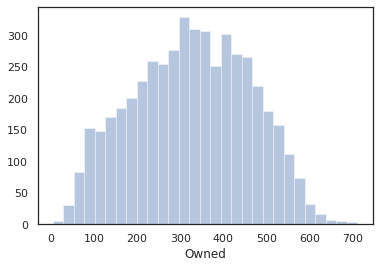

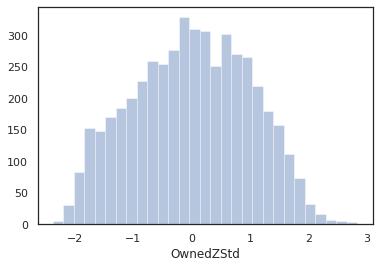

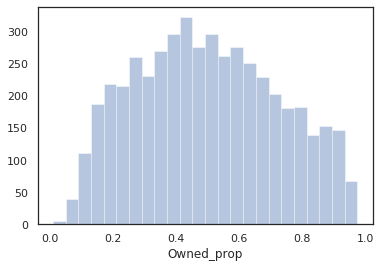

In [33]:
cols = ['Owned','OwnedZStd','Owned_prop']

for c in cols:
    plt.figure()
    sns.distplot(dfs[c], kde=False)

Note how _Owned_ and _OwnedZStd_ have identical shapes (i.e. bars have identical heights), but we have changed the x-axis so that 0 is centred on the original mean across all LSOAs. In contrast, the *Owned_prop* has changed the shape of the data _and_ the range of values on the x-axis. Thus,  proportional normalisation is creating a new, derived measure, whereas the Z-score standardisation is 'just' changing the scale of the original variable. 

Z-scores are useful, because that have properties that we know about: 
- a value of 0 is equal to the mean of the original variable
- values >0 are greater than the mean
- values <0 are less than the mean
- each unit of z is equal to one standard deviation of the original variable

And we can check some of these by printing the 'top' five LSOAs for the Owned variable again:

In [ ]:
print(dfs.sort_values(by='Owned', ascending=False).head(5).round(3)[['LSOA11NM','Owned','OwnedZStd']])

We can see these LSOAS all have z-scores greater than 0 and they descend in value at the same rate as the Owned variable. Most importantly we can concluse from these data that these LSOAs are are all several standard deviations greater than the mean, something we wouldn't know by just looking at the values of the Owned variable itself (check you understand why this is!). 

As succinctly put [here](http://colingorrie.github.io/outlier-detection.html), z-scores are:

> a way of describing a data point in terms of its relationship to the mean and standard deviation of a group of points. Taking a Z-score is simply mapping the data onto a distribution whose mean is defined as 0 and whose standard deviation is defined as 1. The goal of taking Z-scores is to remove the effects of the location and scale of the data, allowing different datasets to be compared directly.

##### Task 2.1

Using the code above as a template, create a _GreenspaceAreaZStd_ variable in the df `DataFrame` then plot its distribution compared to the original _GreenspaceArea_ variable. 

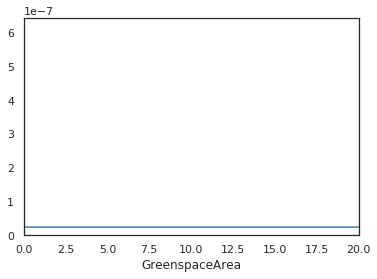

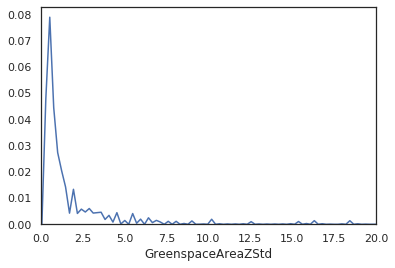

In [34]:
dfs['GreenspaceAreaZStd'] = (dfs.GreenspaceArea - dfs.GreenspaceArea.mean()) / dfs.GreenspaceArea.std()

cols = ['GreenspaceArea','GreenspaceAreaZStd']

for c in cols:
    plt.figure()
    sns.distplot(dfs[c], kde=True, hist=False)
    plt.xlim([0,20])

##### Task 2.2

Do you think that the z-score is a good standardisation to use with Greenspace Area?

> Your answer here!

### The Normal Distribution

Z-scores are often associated with the normal distribution because their interpretation often implicitly assumes a normal distribution. 

Or to put it another way... You can always calculate z-scores for your data (it's just a formula applied to data points), but their _intuitive meaning_ is lost if your data don't have something like a normal distribution (or follow the [68-95-99.7 rule](https://en.wikipedia.org/wiki/68–95–99.7_rule)).

What is this 'intutitive meaning'? Let's re-visit the properties of the normal distribution to see if we can find it...

The standard normal distribution has some useful properties:

![Standard Normal](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

Note that for a perfect normal distribution, we know how much of the data falls within each standard deviation from the mean.  

Note also, how the figures above show the distribution in terms of a mean of zero and units of standard deviation; these are exactly the properties of z-scores! So hopefully you can see how knowing the z-score for an observation from a normally distributed variable (e.g. an attribute of an LSOA) is useful to understand where is falls in the distribution (regardless of the absolute value of the observation).  

But... what if our data are non-normal? Well, Just because data are non-normal doesn't mean z-scores can't be calculated; we just have to be careful what we do with them... and sometimes we should just avoid them entirely. 

Let's look at our data to check we understand when Z-scores are useful (i.e. when our data are 'normal enough'). There are formal tests for establishing the probability that your data are normally distributed, but there are dangers to using these tests with large data sets. So we'll use another approach in which we plot our data with a theoretical normal distribution based on the mean and standard deviation of our data. 

Below is a function to create that theoretical normal distribution. See if you can understand what's going and add comments to the code to explain what each line does. 

In [35]:
import numpy as np  #import the numpy package (needed for random.normal function below)

def normal_from_dist(series):  #define function name and required arguments (in this case a pandas series)
    mu = series.mean()         #calculate the mean of our data
    sd = series.std()          #calculate the standard deviation of our data
    n  = len(series)           #count how many observations are in our data
    s = np.random.normal(mu, sd, n)   #use the parameters of the data just calculated to generate n random numbers, drawn from a normal distributions 
    return s                   #return this set of random numbers

To make it easier to understand what the function above is doing, let's use it! We'll use the function to plot both a distribution plot with both histogram and KDE for our data, and then add a _second_ overplot distplot to the same fig showing the theoretical normal distribution (in red). We'll do this in a loop for each of the three variables we want to examine.

**From the output, which of the three variables has a roughly normal distribution?** Another way to think about this question is, for which of the variables are the mean and standard deviation _most_ appropriate as measures of centrality and spread? 

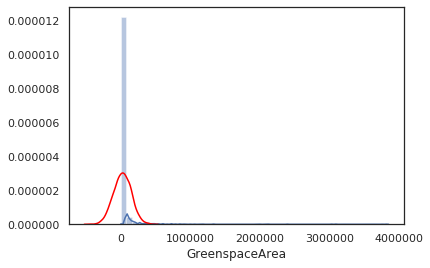

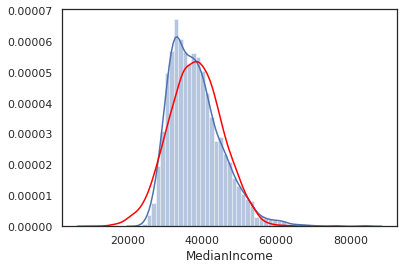

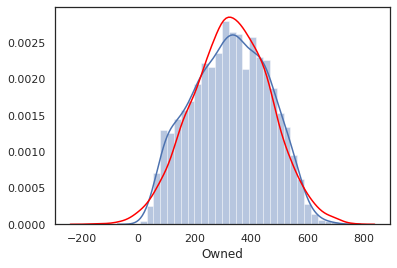

In [36]:
for c in ['GreenspaceArea','MedianIncome','Owned']:
    fig = plt.figure()
    sns.distplot(dfs[c]) 
    sns.distplot(normal_from_dist(dfs[c]), hist=False, color='red') 

From the output, hopefully you can see that:

- _GreenspaceArea_ has a highly non-normal distribution; we shouldn't try to identify any outliers in these variable with the data like this
- _MedianIncome_ is close to normal but it is positively skewed 
- _Owned_ has the 'most normal' distribution - we can see this because this is the variable for which the red and blue lines most closely align. 

We might be tempted to use assume the _MedianIncome_ data are close to normal enough, but in the Transforms section below we'll examine if we could make it even more normal. 

This approach may seem quite rough, but remember what we said right at the outset of this notebook; statistics is not _truth_, it is _judgement_.

##### Task 3.1

Examine the _HHOLDS_, _COMESTRES_ and _POPDEN_ variables to check their distribution. Re-use code from above to plot their distributions with a standard theoretical normal distribution. For any that you think are roughly normal, calculate Z-scores. For _all three_ variables report mean and median and state which you think is most appropriate to use as a measure of central tendency.  

And notice that `sklearn` provides a '[Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)' as well!

0    1.500687
1    1.156343
2    1.059029
3   -1.560977
4   -0.992061
Name: HHOLDSZStd, dtype: float64

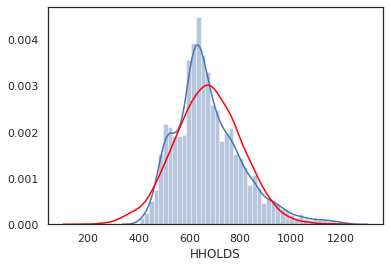

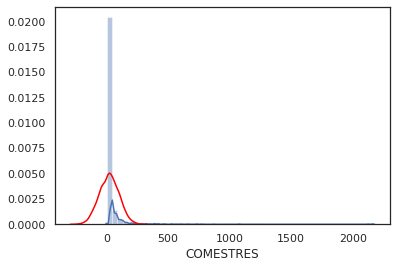

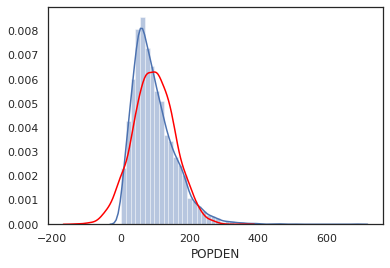

In [244]:
for c in ['HHOLDS','COMESTRES', 'POPDEN']:
    fig = plt.figure()
    sns.distplot(dfs[c]) 
    sns.distplot(normal_from_dist(dfs[c]), hist=False, color='red')
    
# I would suggest that only HHOLDS is remotely normal
# enough for z-scores to be meaningful
std_scaler = preprocessing.StandardScaler()

dfs['HHOLDSZStd'] = std_scaler.fit_transform(dfs.HHOLDS.values.reshape(-1, 1))

dfs.HHOLDSZStd.head(5)

Now look at the top and bottom z-scores and think about whether this distribution is suitable for this kind of transformation:

In [38]:
print(dfs.sort_values(by='HHOLDSZStd', ascending=False).head(7).round(3)[['LSOA11NM','HHOLDS','HHOLDSZStd']])
print()
print(dfs.sort_values(by='HHOLDSZStd', ascending=True).head(7).round(3)[['LSOA11NM','HHOLDS','HHOLDSZStd']])

                LSOA11NM  HHOLDS  HHOLDSZStd
1219         Ealing 015B    1236       4.196
4770         Newham 013G    1205       3.963
4540    Westminster 014B    1204       3.956
2076         Harrow 023A    1203       3.949
1024        Croydon 027B    1202       3.941
4209  Tower Hamlets 009D    1193       3.874
995         Croydon 024A    1186       3.821

            LSOA11NM  HHOLDS  HHOLDSZStd
1276     Ealing 017C     404      -2.033
2125     Harrow 033F     406      -2.018
3508     Newham 004B     407      -2.010
2607   Hounslow 021E     407      -2.010
2120     Harrow 033A     408      -2.003
1353     Ealing 037G     412      -1.973
3607  Redbridge 035B     413      -1.965


----

## Non-Linear Transformations

So transformations are useful when a data series has features that make comparisons or analysis difficult, or that affect our ability to intuit meaningful difference. By manipulating the data using one or more mathematical operations we can sometimes make it more *tractable* for subsequent analysis. In other words, it's all about the _context_ of our data.

[![How tall is tall?](http://img.youtube.com/vi/-VjcCr4uM6w/0.jpg)](http://www.youtube.com/watch?v=-VjcCr4uM6w)

From above, we know the _MedianIncome_ data are _not_ normally distributed, but can we work out what distribution best represents _MedianIncome_? This can be done by comparing the shape of the histogram to the shapes of theoretical distributitions. For example:

- the [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) distribution
- the [exponential](https://en.wikipedia.org/wiki/Exponential_distribution) distribution
- the [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) distribution (for non-continuous data)
 
From looking at those theoretical distributions, we might make an initial guess as to the type of distribution. There are actually _many_ other distributions encountered in real life data, but these ones are particuarly common. A wider view of this would be that [quantile and power transformations](https://scikit-learn.org/stable/modules/preprocessing.html#non-linear-transformation) are ways of preserving the rank of values but lose many of the other features of the relationships that might be preserved by, for instance, the standard scaler.

In the case of Median Income, taking a log-transform of the data might make it _appear_ more normal: you do **not** say that a transformation _makes_ data more normal, you say either that 'it allows us to treat the data as normally distributed' or that 'the transformed data follows a log-normal distribution'.

### What is a Logarithm?

Logarithmic transformations are also considered fairly simple, but they are _non_-linear transformations and so they do change the relationships in your data in important ways. Although you _could_ use any logarithm, the natural log is considered the most useful since both the mean and standard deviation retain _some_ meaning (though you probably wouldn't report these as such). If you don’t remember what a logarithm is try these:

[![From reality to make-believe](http://img.youtube.com/vi/zzu2POfYv0Y/0.jpg)](https://www.youtube.com/watch?v=zzu2POfYv0Y)

[![From reality to make-believe](http://img.youtube.com/vi/akXXXx2ahW0/0.jpg)](https://www.youtube.com/watch?v=akXXXx2ahW0)

[![From reality to make-believe](http://img.youtube.com/vi/0fKBhvDjuy0/0.jpg)](https://www.youtube.com/watch?v=0fKBhvDjuy0)

The last video was made by Ray & Charles Eames, two of the 20th Century’s most famous designers.

### Logarithmic Transformations

To create a new series in the data frame containing the natural log of the original value it’s a similar process to what we've done before, but since pandas doesn't provide a log-transform operator (i.e. you can’t call `df['MedianIncome'].log()` ) we need to use the `numpy` package since pandas data series are just numpy arrays with some fancy window dressing that makes them even _more_ useful:
```python
series = pd.Series(np.log(df['MedianIncome']))
```
Let's perform the transform then compare to the un-transformed data. Comment the code below to ensure that you understand what it is doing. 

       MedianIncome  logMedianIncome
count        4835.0           4835.0
mean        38349.1             10.5
std          7143.5              0.2
min         23860.0             10.1
25%         32975.0             10.4
50%         37310.0             10.5
75%         42335.0             10.7
max         84410.0             11.3


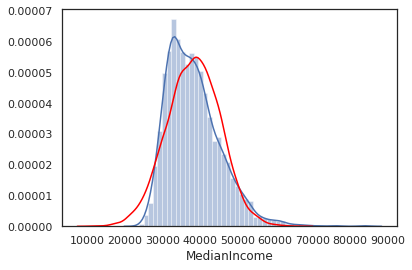

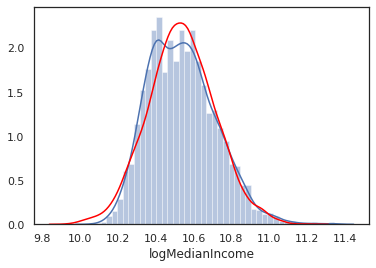

In [39]:
import numpy as np  #import numpy

dfs['logMedianIncome'] = pd.Series(np.log(dfs.MedianIncome)) #calculate the logarithm of each data point

print(dfs.describe().round(1)[['MedianIncome','logMedianIncome']])   #print a description of these new values

cols = ['MedianIncome','logMedianIncome']  #set the columns of the data for which we want to plot

for m in cols:                             #loop creating plots
    series = dfs[m]
    plt.figure()
    sns.distplot(series)
    sns.distplot(normal_from_dist(series), hist=False, color='red') #add the theoretical normal distribution

Hopefully, you can see that the transformed data do indeed look 'more normal'; the peak of the red and blue lines are closer together and the blue line at the lower extreme is also closer to the red line, but we can check this by seeing what has happened to the z-scores.

### Applying Rescaling and Transformations Together

##### Task 4.1

Calculate z-scores for the _MedianIncome_ data and the log-transformed _MedianIncome_ data, and print out the top and bottom 5 observations for _MedianIncome_ and compare the z-scores. Check you can see how the lower extreme z-scores for the log-transformed data reflect the histogram above. 

In [40]:
dfs['MedianIncomeZ'] = std_scaler.fit_transform(dfs.MedianIncome.values.reshape(-1, 1))
dfs['logMedianIncomeZ'] = std_scaler.fit_transform(dfs.logMedianIncome.values.reshape(-1, 1))

cols= ['LSOA11NM','MedianIncome','MedianIncomeZ','logMedianIncome','logMedianIncomeZ']
print("Top LSOAs")
print(dfs.sort_values(by='MedianIncome', ascending=False).head(5).round(3)[cols])
print("Bottom LSOAs")
print(dfs.sort_values(by='MedianIncome', ascending=True).head(5).round(3)[cols])

Top LSOAs
                         LSOA11NM  MedianIncome  MedianIncomeZ  \
4569             Westminster 019C         84410          6.449   
4567             Westminster 019A         84300          6.433   
4570             Westminster 019D         82920          6.240   
2838  Kensington and Chelsea 018E         77150          5.432   
2825  Kensington and Chelsea 010C         76220          5.302   

      logMedianIncome  logMedianIncomeZ  
4569           11.343             4.546  
4567           11.342             4.539  
4570           11.326             4.446  
2838           11.254             4.038  
2825           11.241             3.970  
Bottom LSOAs
              LSOA11NM  MedianIncome  MedianIncomeZ  logMedianIncome  \
4554  Westminster 009A         23860         -2.028           10.080   
1989     Haringey 002C         24410         -1.951           10.103   
1988     Haringey 037B         24760         -1.902           10.117   
1409      Enfield 030E         24840    

##### Task 4.2

Now plot these to compare the two z-score standardised distributions.

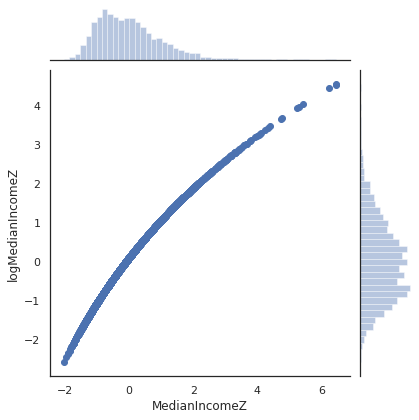

In [41]:
sns.jointplot(data=dfs, x='MedianIncomeZ', y='logMedianIncomeZ')

Now let's look at the **Greenspace Area** data. These data were even further from a normal distribution than the _MedianIncome_ data and they don't really look very log-normal but sometimes it's good just to start with what you know. So let's try a log transform first and then plot the distribution:

ValueError: cannot convert float NaN to integer

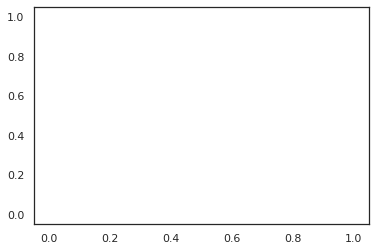

In [42]:
dfs['logGSA'] = pd.Series(np.log(dfs.GreenspaceArea)) 
sns.distplot(dfs['logGSA'])

##### Task 4.3

Did you get an error? Can you work out why that is....? 

> Your answer here.

Have a look at the data below for a clue if you are stuck.

In [44]:
print(dfs.sample(7, random_state=42)[['GreenspaceArea', 'logGSA']])

      GreenspaceArea    logGSA
3317        0.000000      -inf
2533        0.000000      -inf
1041        0.000000      -inf
3307        0.000000      -inf
4401        0.000000      -inf
3898      341.713356  5.833972
1926        0.000000      -inf


See all those `-inf`? Seaborn just doesn't know what to do with them!

We frequently have zeros in our data so this sort of thing happens a lot in data analysis. A common solution in this case is to add a small value to _every_ observation (shifting the scale) such that there are no zeros in the data. _Then_ we can take make a log transform with no problem. To prove this:

In [45]:
dfs['logGSA'] = pd.Series(np.log(dfs.GreenspaceArea+1)) 
print(dfs.sample(10, random_state=42)[['GreenspaceArea', 'logGSA']])

      GreenspaceArea    logGSA
3317        0.000000  0.000000
2533        0.000000  0.000000
1041        0.000000  0.000000
3307        0.000000  0.000000
4401        0.000000  0.000000
3898      341.713356  5.836894
1926        0.000000  0.000000
3094        0.000000  0.000000
764         0.000000  0.000000
3447        0.000000  0.000000


Hopefully you can see the small edit I made to the previous code. _Now_ we don't have `-Inf` values and Seaborn should be a little happer:

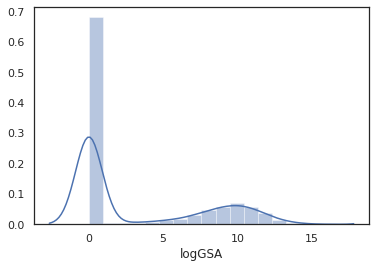

In [46]:
sns.distplot(dfs['logGSA'])

Success!

But now this plot _is_ interesting: the figure shows what seems to be two quite different things going on in our data! We've obviously got the LSOAs that contain _no_ greenspace, but then we've got something else that is _much_ closer to 'normal' (though not properly normal). 

In this case we should maybe start thinking about splitting this variable into two and thinking about the LSOAs in each group; how and why are LSOAs with zero greenspace different from those with some greenspace? One thing we might do for example is map the location of the different groups of LSOAs (but we'll get to that later). 

##### Task 4.4

Plot a histogram of the log-transformed greenspace area for LSOAs with at least _some_ greenspace, and think about what the plot shows: 
- how are the data skewed?
- what are the mean and median?

What about if we looked at the distribution of greenspace area _proportion_?

These are the sorts of questions we should be raising in our minds as we go through the data analysis process (of course, guided by our research questions...)

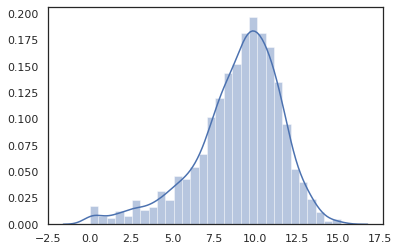

In [47]:
sns.distplot(dfs[dfs.logGSA > 0][['logGSA']])

## Maps & Transformations

### Reprojection as Transformation

It's not automatically obvious, but map projections are _also_ a kind of transformation: in the broadest sense, we take coordinates on a sphere and have to transform them in some way so that every point on the sphere can be mapped to a point on a plane (_ie._ a map) in a way that best preserves the relationship between the points. The definition of 'best' depends on what you're trying to do: navigate a boat across the Atlantic? drive around the UK? drive across Russia? preserve the area occupied by a landmass? Also, the Earth is not even remotely close to being a sphere, so in practice there are _many_ different transformations (aka projections) to choose from.

Geopandas supports quite a few of these, and they are best seen when looking at large areas of the Earth's surface:

The CRS (projection) for this data is: {'init': 'epsg:4326'}


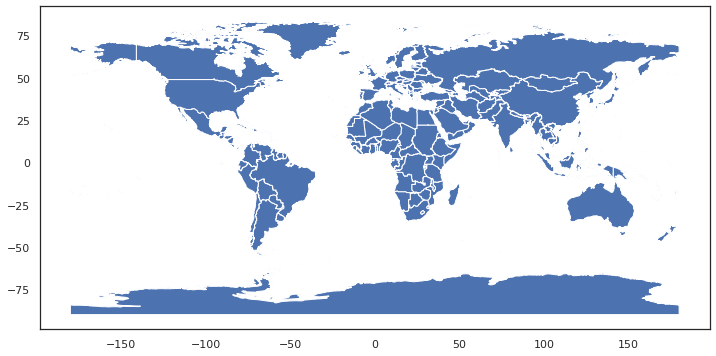

In [67]:
import geopandas as gpd
world = gpd.read_file('https://github.com/kingsgeocomp/geocomputation/raw/master/data/src/TM_WORLD_BORDERS-0.3.gpkg')
print("The CRS (projection) for this data is: {0}".format(world.crs))
fig, ax = plt.subplots(1,1,figsize=(12,6))
world.plot(ax=ax)

The CRS (projection) for this data is: {'init': 'epsg:27700', 'no_defs': True}


(-5000000, 5000000)

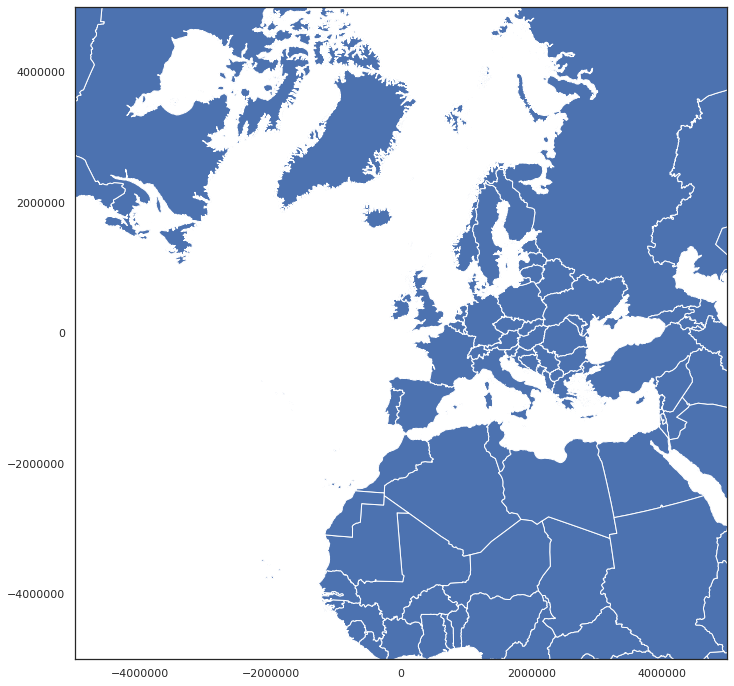

In [72]:
osgb = world.to_crs(epsg=27700)
print("The CRS (projection) for this data is: {0}".format(osgb.crs))
fig, ax = plt.subplots(1,1,figsize=(12,12))
osgb.plot(ax=ax)
view = 5000000
ax.set_xlim([-view,view])
ax.set_ylim([-view,view])

The CRS (projection) for this data is: {'init': 'epsg:3035', 'no_defs': True}


(-5000000, 5000000)

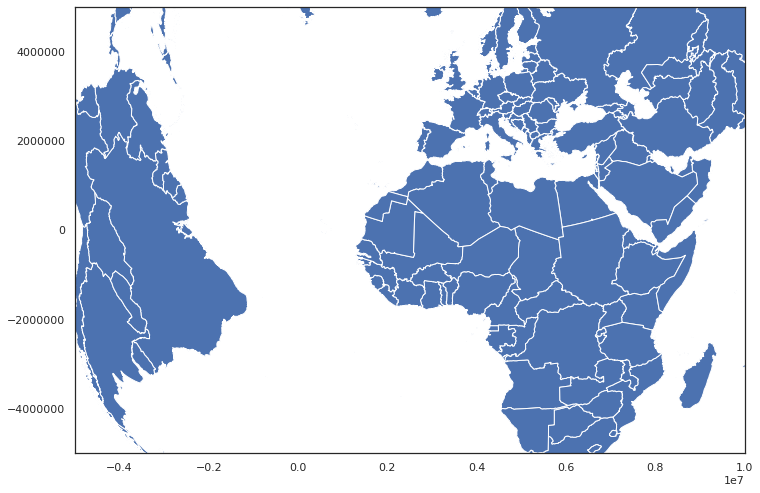

In [74]:
etrs = world.to_crs(epsg=3035)
print("The CRS (projection) for this data is: {0}".format(etrs.crs))
fig, ax = plt.subplots(1,1,figsize=(12,12))
etrs.plot(ax=ax)
view = 5000000
ax.set_xlim([-view,view*2])
ax.set_ylim([-view,view])

Even projections that don't have an explicit CRS or EPSG representation can be used as long as there's a PROJ4 string that can be used: [see Geopandas documentation](http://geopandas.org/projections.html).

The CRS (projection) for this data is: +proj=vandg +lon_0=0 +x_0=0 +y_0=0 +R_A +a=6371000 +b=6371000 +units=m +no_defs


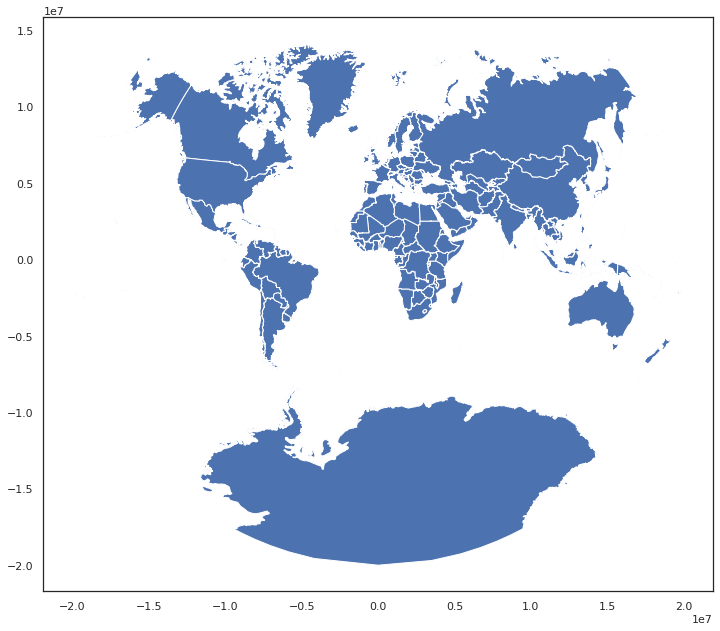

In [198]:
etrs = world.to_crs('+proj=vandg +lon_0=0 +x_0=0 +y_0=0 +R_A +a=6371000 +b=6371000 +units=m +no_defs')
print("The CRS (projection) for this data is: {0}".format(etrs.crs))
fig, ax = plt.subplots(1,1,figsize=(10,10))
etrs.plot(ax=ax)

The CRS (projection) for this data is: +proj=vandg +lon_0=0 +x_0=0 +y_0=0 +R_A +a=6371000 +b=6371000 +units=m +no_defs


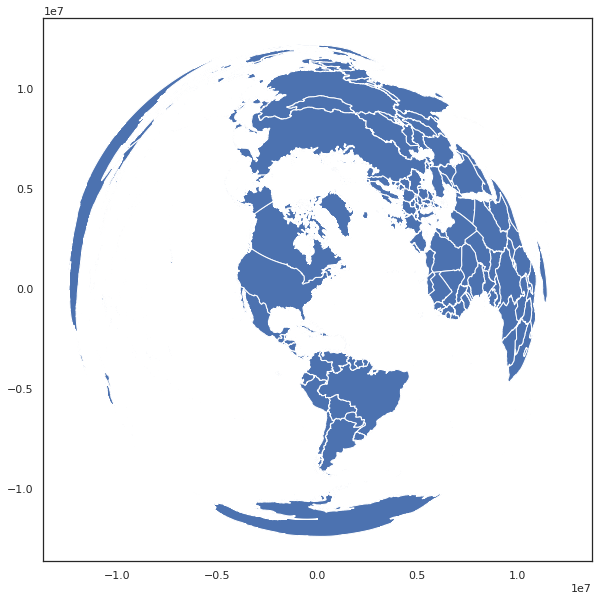

In [305]:
laea = world.to_crs('+proj=laea +lon_0=-74 +x_0=0 +y_0=0 +lat_0=40 +no_defs')
print("The CRS (projection) for this data is: {0}".format(etrs.crs))
fig, ax = plt.subplots(1,1,figsize=(10,10))
laea.plot(ax=ax)

### Transformation & Classification

Finally, one of the most useful applications of transformations is in presenting data in a manner that best enables the viewer to both generalise from what they see _while_ retaining as much accuracy as possible. Let's explore this using data for London using the LSOAs Geopackage for the wider area that includes the GLA and LSOAs beyond that for completeness.

#### Setup

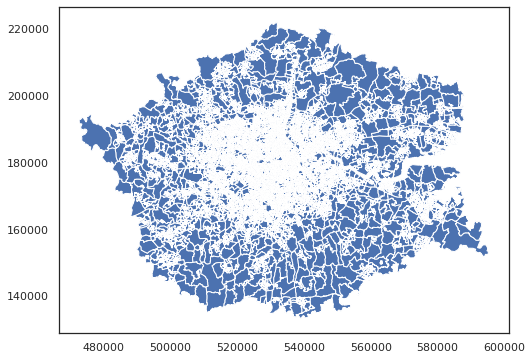

In [133]:
import geopandas as gpd
ldn = gpd.read_file('https://github.com/kingsgeocomp/geocomputation/raw/master/data/src/LSOAs.gpkg')
fig, ax = plt.subplots(1,1,figsize=(12,6))
ldn.plot(ax=ax)

Merge this with the LSOA data from London.

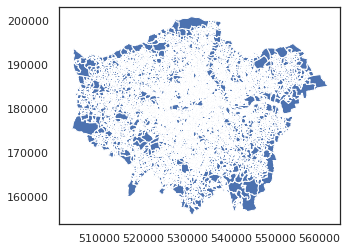

In [199]:
from shapely import wkt

df = pd.read_csv('https://github.com/kingsgeocomp/geocomputation/raw/master/data/LondonLSOAData.csv.gz')

lsoas = ldn.merge(df, left_on='lsoa11cd', right_on='LSOA11CD', how='inner')

lsoas['geometry'] = lsoas['geometry_y'].apply(wkt.loads)
lsoas = lsoas.set_geometry('geometry')

lsoas.plot()

You'll see that here we import two functions:
1. `scipy.stats.norm` is equivalent to the function that we wrote above (though probably a bit more rigorous) and it allows us to plot the equivalent normal distribution directly into seaborn without having to append a new graph to the existing axes.
2. `mpl_toolkits.axes_grid1.make_axes_locatable` is a utility function that allows us to position the colorbar more accurately relative to the map. There are other ways to draw this colorbar manually, but they require a lot more effort.

In [257]:
from scipy.stats import norm
from mpl_toolkits.axes_grid1 import make_axes_locatable

We're doing quite a few things here, so it's worth adding notes to make sure that you understand what's going on:
1. We create a figure with two subplots (one next to the other: 1 row, 2 columns).
2. We plot a Seaborn distplot into one of the subplots.
3. We plot a Geopandas map into the other subplot.
4. We tweak the positioning of the legend.
5. We add vertical lines (`vlines`) at the mean, 0.6745 std, and 1.96 std from the mean.
6. We add some output about where these vlines have been positioned.

#### Raw Data Counts

The sample mean is: 1010.84
50% of the data should fall between: 784.84 and 1236.85
95% of the data should fall between: 354.10 and 1667.59


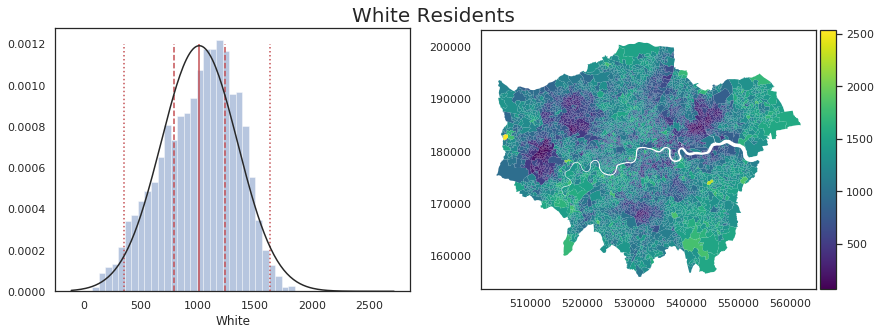

In [260]:
fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"White Residents", fontsize=20, y=0.94)
sns.distplot(lsoas.White, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='White', ax=axes[1], cmap=mpl.cm.get_cmap('viridis'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.White.mean(), 
    0, 0.0012, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.White.mean()-0.6745*lsoas.White.std(), lsoas.White.mean()+0.6745*lsoas.White.std()], 
    0, 0.0012, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.White.mean()-1.96*lsoas.White.std(), lsoas.White.mean()+1.86*lsoas.White.std()], 
    0, 0.0012, colors='r', linestyle='dotted')
print(f"The sample mean is: {lsoas.White.mean():0.2f}")
print(f"50% of the data should fall between: {lsoas.White.mean()-0.6745*lsoas.White.std():0.2f} and {lsoas.White.mean()+0.6745*lsoas.White.std():0.2f}")
print(f"95% of the data should fall between: {lsoas.White.mean()-1.96*lsoas.White.std():0.2f} and {lsoas.White.mean()+1.96*lsoas.White.std():0.2f}")

#### Natural Log of Counts

Note that we also reverse the transformation in order to work out what the _equivalent_ +/- 0.6745 and 1.96 Std area in terms of the raw counts.

The sample mean is: 6.85
50% of the data should fall between: 6.56 and 232.85
95% of the data should fall between: 6.02 and 663.60

This is equivalent to a raw count of: 939.76
And to 50% of the data falling between: 707.96 and 1247.46
And to 95% of the data falling between: 412.64 and 2140.24


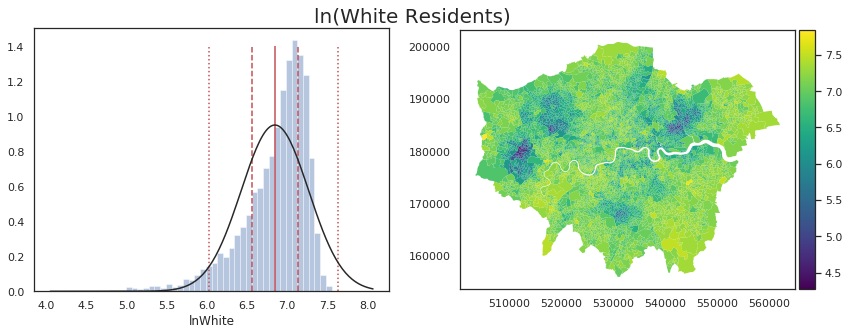

In [301]:
lsoas['lnWhite'] = np.log(lsoas.White)

fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"ln(White Residents)", fontsize=20, y=0.94)
sns.distplot(lsoas.lnWhite, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='lnWhite', ax=axes[1], cmap=mpl.cm.get_cmap('viridis'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.lnWhite.mean(), 
    0, 1.4, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.lnWhite.mean()-0.6745*lsoas.lnWhite.std(), lsoas.lnWhite.mean()+0.6745*lsoas.lnWhite.std()], 
    0, 1.4, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.lnWhite.mean()-1.96*lsoas.lnWhite.std(), lsoas.lnWhite.mean()+1.86*lsoas.lnWhite.std()], 
    0, 1.4, colors='r', linestyle='dotted')
print(f"The sample mean is: {lsoas.lnWhite.mean():0.2f}")
print(f"50% of the data should fall between: {lsoas.lnWhite.mean()-0.6745*lsoas.lnWhite.std():0.2f} and {lsoas.lnWhite.mean()+0.6745*lsoas.White.std():0.2f}")
print(f"95% of the data should fall between: {lsoas.lnWhite.mean()-1.96*lsoas.lnWhite.std():0.2f} and {lsoas.lnWhite.mean()+1.96*lsoas.White.std():0.2f}")
print()
print(f"This is equivalent to a raw count of: {np.exp(lsoas.lnWhite.mean().reshape(1, -1))[0][0]:0.2f}")
print(f"And to 50% of the data falling between: {np.exp((lsoas.lnWhite.mean()-0.6745*lsoas.lnWhite.std()).reshape(1, -1))[0][0]:0.2f} and {np.exp((lsoas.lnWhite.mean()+0.6745*lsoas.lnWhite.std()).reshape(1, -1))[0][0]:0.2f}")
print(f"And to 95% of the data falling between: {np.exp((lsoas.lnWhite.mean()-1.96*lsoas.lnWhite.std()).reshape(1, -1))[0][0]:0.2f} and {np.exp((lsoas.lnWhite.mean()+1.96*lsoas.lnWhite.std()).reshape(1, -1))[0][0]:0.2f}")

#### Z-Score Standardised Counts

The sample mean is: 1010.84
50% of the data should fall between: 784.84 and 1236.85
95% of the data should fall between: 354.10 and 1667.59


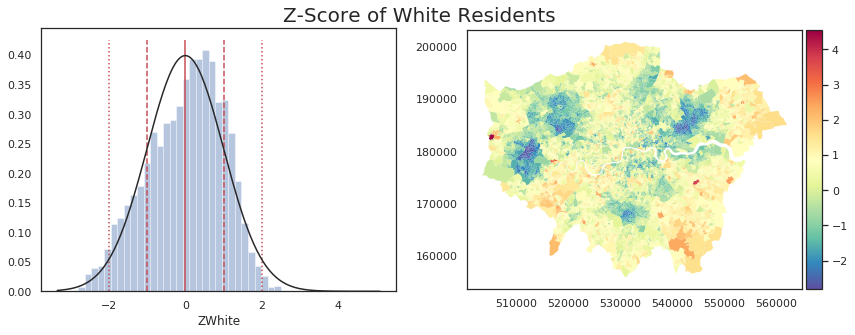

In [265]:
lsoas['ZWhite'] = (lsoas.White-lsoas.White.mean())/lsoas.White.std()

fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"Z-Score of White Residents", fontsize=20, y=0.94)
sns.distplot(lsoas.ZWhite, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='ZWhite', ax=axes[1], cmap=mpl.cm.get_cmap('Spectral_r'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.ZWhite.mean(), 
    0, 0.425, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.ZWhite.mean()-lsoas.ZWhite.std(), lsoas.ZWhite.mean()+lsoas.ZWhite.std()], 
    0, 0.425, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.ZWhite.mean()-2*lsoas.ZWhite.std(), lsoas.ZWhite.mean()+2*lsoas.ZWhite.std()], 
    0, 0.425, colors='r', linestyle='dotted')
print(f"The sample mean is: {(lsoas.ZWhite.mean()*lsoas.White.std())+lsoas.White.mean():0.2f}")
print(f"50% of the data should fall between: {(lsoas.ZWhite.mean()-0.6745*lsoas.ZWhite.std())*lsoas.White.std()+lsoas.White.mean():0.2f} and {(lsoas.ZWhite.mean()+0.6745*lsoas.ZWhite.std())*lsoas.White.std()+lsoas.White.mean():0.2f}")
print(f"95% of the data should fall between: {(lsoas.ZWhite.mean()-1.96*lsoas.ZWhite.std())*lsoas.White.std()+lsoas.White.mean():0.2f} and {(lsoas.ZWhite.mean()+1.96*lsoas.ZWhite.std())*lsoas.White.std()+lsoas.White.mean():0.2f}")

#### Share of Total

In this case it's the share of each LSOA that is white.

The sample mean is: 0.61
50% of the data should fall between: 0.47 and 0.74
95% of the data should fall between: 0.21 and 1.01


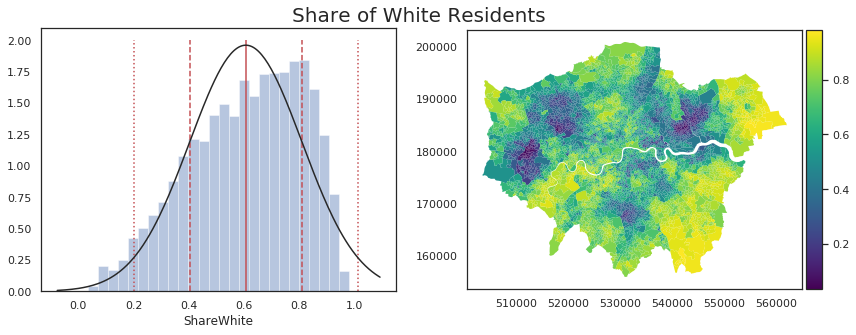

In [261]:
lsoas['ShareWhite'] = lsoas.White/lsoas.USUALRES

fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"Share of White Residents", fontsize=20, y=0.94)
sns.distplot(lsoas.ShareWhite, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='ShareWhite', ax=axes[1], cmap=mpl.cm.get_cmap('viridis'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.ShareWhite.mean(), 
    0, 2, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.ShareWhite.mean()-lsoas.ShareWhite.std(), lsoas.ShareWhite.mean()+lsoas.ShareWhite.std()], 
    0, 2, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.ShareWhite.mean()-2*lsoas.ShareWhite.std(), lsoas.ShareWhite.mean()+2*lsoas.ShareWhite.std()], 
    0, 2, colors='r', linestyle='dotted')
print(f"The sample mean is: {lsoas.ShareWhite.mean():0.2f}")
print(f"50% of the data should fall between: {lsoas.ShareWhite.mean()-0.6745*lsoas.ShareWhite.std():0.2f} and {lsoas.ShareWhite.mean()+0.6745*lsoas.ShareWhite.std():0.2f}")
print(f"95% of the data should fall between: {lsoas.ShareWhite.mean()-1.96*lsoas.ShareWhite.std():0.2f} and {lsoas.ShareWhite.mean()+1.96*lsoas.ShareWhite.std():0.2f}")

#### Location Quotient

This is the Location Quotient for White residents, so it's a way of comparing the share of a LSOA that is white to the overall (average) share of London that is White. We would normally expect the mean LQ to be 1.00.

The sample mean is: 1.02
50% of the data should fall between: 0.79 and 1.24
95% of the data should fall between: 0.35 and 1.68


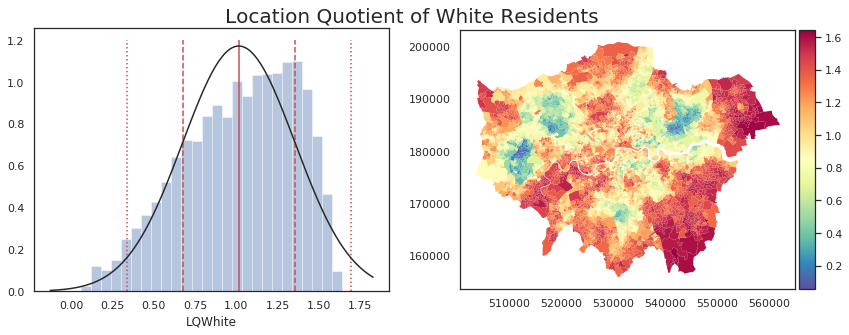

In [289]:
lsoas['LQWhite'] = (lsoas.White/lsoas.USUALRES)/(lsoas.White.sum()/lsoas.USUALRES.sum())

fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"Location Quotient of White Residents", fontsize=20, y=0.94)
sns.distplot(lsoas.LQWhite, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='LQWhite', ax=axes[1], cmap=mpl.cm.get_cmap('Spectral_r'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.LQWhite.mean(), 
    0, 1.2, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.LQWhite.mean()-lsoas.LQWhite.std(), lsoas.LQWhite.mean()+lsoas.LQWhite.std()], 
    0, 1.2, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.LQWhite.mean()-2*lsoas.LQWhite.std(), lsoas.LQWhite.mean()+2*lsoas.LQWhite.std()], 
    0, 1.2, colors='r', linestyle='dotted')
print(f"The sample mean is: {lsoas.LQWhite.mean():0.2f}")
print(f"50% of the data should fall between: {lsoas.LQWhite.mean()-0.6745*lsoas.LQWhite.std():0.2f} and {lsoas.LQWhite.mean()+0.6745*lsoas.LQWhite.std():0.2f}")
print(f"95% of the data should fall between: {lsoas.LQWhite.mean()-1.96*lsoas.LQWhite.std():0.2f} and {lsoas.LQWhite.mean()+1.96*lsoas.LQWhite.std():0.2f}")

#### Standardised Location Quotient

Here we've transformed the Location Quotient so that it follows a normal distribution no matter the _raw_ LQ values. Notice that we've reversed the transform in order to find the equivalent raw LQ for the mean and +/- 0.6745 and 1.96 Std.

In case this approach seems a tad arbitrary, here are two articles wrestling with how to determine cut-offs for measuring agglomeration using the distribution of Location Quotients: [O'Donoghue & Gleave (2003)](https://www.tandfonline.com/doi/full/10.1080/03434002000213932) and [Tian (2013)](http://www.jrap-journal.org/pastvolumes/2010/v43/v43_n2_a8_tian.pdf)!

The sample mean is: -0.00
50% of the data should fall between: -0.67 and 0.67
95% of the data should fall between: -1.95 and 1.95

This is equivalent to a raw LQ of: 1.06
And to 50% of the data falling between: 0.77 and 1.30
And to 95% of the data falling between: 0.31 and 1.53


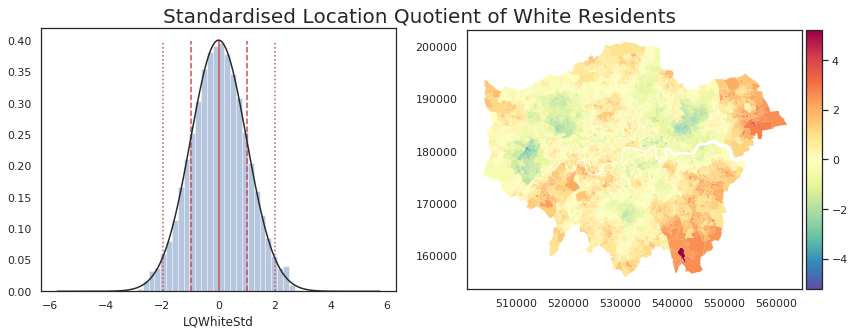

In [290]:
from sklearn.preprocessing import QuantileTransformer
import matplotlib.colors as colors

qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

lsoas['LQWhiteStd'] = qt.fit_transform(X=lsoas.LQWhite.values.reshape(-1,1))

divnorm = colors.DivergingNorm(vmin=lsoas.LQWhiteStd.min(), vcenter=0, vmax=lsoas.LQWhiteStd.max())

fig, axes = plt.subplots(1,2,figsize=(14,4.85))
fig.suptitle(f"Standardised Location Quotient of White Residents", fontsize=20, y=0.94)
sns.distplot(lsoas.LQWhiteStd, fit=norm, kde=False, ax=axes[0])
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
lsoas.plot(column='LQWhiteStd', ax=axes[1], cmap=mpl.cm.get_cmap('Spectral_r'), linewidth=0, 
           legend=True, cax=cax, zorder=0)
axes[0].vlines(
    lsoas.LQWhiteStd.mean(), 
    0, 0.4, colors='r', linestyle='solid')
axes[0].vlines(
    [lsoas.LQWhiteStd.mean()-lsoas.LQWhiteStd.std(), lsoas.LQWhiteStd.mean()+lsoas.LQWhiteStd.std()], 
    0, 0.4, colors='r', linestyle='dashed')
axes[0].vlines(
    [lsoas.LQWhiteStd.mean()-2*lsoas.LQWhiteStd.std(), lsoas.LQWhiteStd.mean()+2*lsoas.LQWhiteStd.std()], 
    0, 0.4, colors='r', linestyle='dotted')
print(f"The sample mean is: {lsoas.LQWhiteStd.mean():0.2f}")
print(f"50% of the data should fall between: {lsoas.LQWhiteStd.mean()-0.6745*lsoas.LQWhiteStd.std():0.2f} and {lsoas.LQWhiteStd.mean()+0.6745*lsoas.LQWhiteStd.std():0.2f}")
print(f"95% of the data should fall between: {lsoas.LQWhiteStd.mean()-1.96*lsoas.LQWhiteStd.std():0.2f} and {lsoas.LQWhiteStd.mean()+1.96*lsoas.LQWhiteStd.std():0.2f}")
print()
print(f"This is equivalent to a raw LQ of: {qt.inverse_transform(lsoas.LQWhiteStd.mean().reshape(1, -1))[0][0]:0.2f}")
print(f"And to 50% of the data falling between: {qt.inverse_transform((lsoas.LQWhiteStd.mean()-0.6745*lsoas.LQWhiteStd.std()).reshape(1, -1))[0][0]:0.2f} and {qt.inverse_transform((lsoas.LQWhiteStd.mean()+0.6745*lsoas.LQWhiteStd.std()).reshape(1, -1))[0][0]:0.2f}")
print(f"And to 95% of the data falling between: {qt.inverse_transform((lsoas.LQWhiteStd.mean()-1.96*lsoas.LQWhiteStd.std()).reshape(1, -1))[0][0]:0.2f} and {qt.inverse_transform((lsoas.LQWhiteStd.mean()+1.96*lsoas.LQWhiteStd.std()).reshape(1, -1))[0][0]:0.2f}")

### Over to You

There are inefficiencies in the code above -- how many can you find, and how can you resolve them by writing one or more functions to streamline your code? Apply these to _either_ the Owned _or_ NO2sd variables.

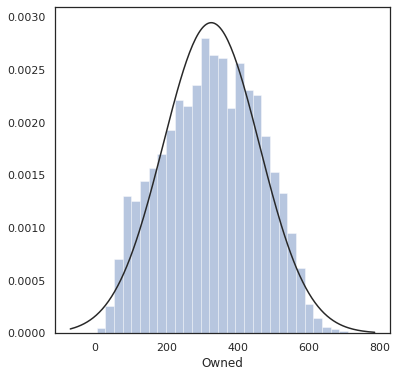

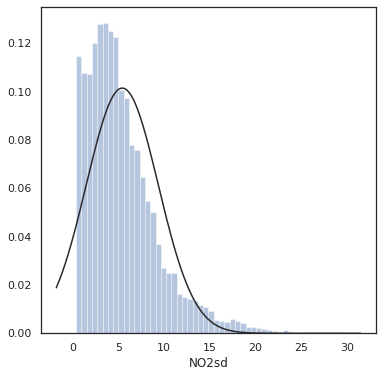

In [303]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.distplot(lsoas.Owned, fit=norm, kde=False)

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.distplot(lsoas.NO2sd, fit=norm, kde=False)

## Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: Jon Reades (jonathan.reades@kcl.ac.uk), James Millington (james.millington@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of [The MIT License](https://opensource.org/licenses/mit-license.php) and the [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.

#### Potential Dependencies:
This notebook may depend on the following libraries: pandas, matplotlib, seaborn